In [1]:
%matplotlib inline

In [2]:
# initialization
from rayoptics.environment import *

from rayoptics.optical.trace import trace_coddington_fan

In [3]:
root_pth = Path(rayoptics.__file__).resolve().parent

In [4]:
app = AppManager(None)

# Create a new model

In [5]:
app.model = open_model(root_pth/"codev/tests/ag_dblgauss.seq")
opm = app.model
sm = opm.seq_model
osp = opm.optical_spec
pm = opm.parax_model

In [6]:
opm.update_model()

In [7]:
pm.list_lens()

      ax_ray_ht    ax_ray_slp
0:            0   2.51525e-11
1:           25     -0.276808
2:       23.507     -0.180751
3:       23.417     -0.558186
4:       19.076     -0.558186
5:       17.753     -0.116096
6:       15.853     -0.116096
7:       14.256      0.187054
8:         14.7      0.187054
9:        15.97    -0.0741853
10:       15.932     -0.129901
11:       15.371     -0.249991
12:      0.10006     -0.249991

      pr_ray_ht    pr_ray_slp
0:  -2.4782e+11      0.249328
1:      -14.439      0.409202
2:      -12.232      0.359218
3:      -12.052      0.553482
4:      -7.7482      0.553482
5:      -6.4365      0.393199
6:   -1.748e-06      0.393199
7:       5.4057      0.508146
8:         6.61      0.508146
9:       10.059      0.343587
10:       10.231      0.307809
11:       11.561      0.217488
12:       24.847      0.217488

          power           tau        index    type
0:            0    9.9394e+11      1.00000    InteractionMode.Transmit
1:   0.01107233        5.3936 

In [8]:
fld, wvl, foc = osp.lookup_fld_wvl_focus(2)

In [9]:
ray, op, wvl = trace_base(opm, [0., 0.], fld, wvl)
cr = RayPkg(ray, op, wvl)

In [10]:
list_ray(ray)

            X            Y            Z           L            M            N               Len
  0:      0.00000 -247816674315.63208            0     0.000000     0.241922     0.970296   1.0244e+12
  1:      0.00000    -14.40611       1.8777     0.000000     0.247454     0.968900       7.6249
  2:      0.00000    -12.51930      0.51547     0.000000     0.349083     0.937092       2.0119
  3:      0.00000    -11.81698       1.9008     0.000000     0.335724     0.941960       11.252
  4:      0.00000     -8.03932            0     0.000000     0.336554     0.941664       4.9422
  5:      0.00000     -6.37600      0.85391     0.000000     0.380100     0.924946       16.775
  6:      0.00000      0.00000            0     0.000000     0.380100     0.924946       14.296
  7:      0.00000      5.43384     -0.52511     0.000000     0.309998     0.950737       4.5492
  8:      0.00000      6.84409            0     0.000000     0.306748     0.951791       10.158
  9:      0.00000      9.96017   

In [11]:
s_dfoc, t_dfoc = trace_coddington_fan(opm, RayPkg(ray, op, wvl))
s_dfoc, t_dfoc

(-0.1313029911732997, 0.03458272372224919)

In [12]:
s_data = []
t_data = []
field_data = []

In [13]:
for f in np.linspace(0., osp.field_of_view.max_field()[0], num=11):
    fld.y = f
    cr = RayPkg(*trace_base(opm, [0., 0.], fld, wvl))
    s_dfoc, t_dfoc = trace_coddington_fan(opm, cr)
    s_data.append(s_dfoc)
    t_data.append(t_dfoc)
    field_data.append(f)

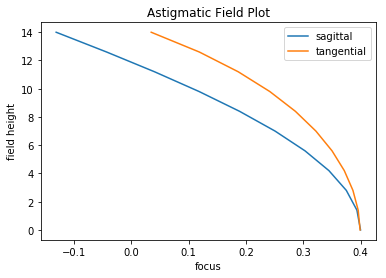

In [14]:
plt.plot(s_data, field_data, label='sagittal')
plt.plot(t_data, field_data, label='tangential')

plt.xlabel('focus')
plt.ylabel('field height')

plt.title("Astigmatic Field Plot")

plt.legend()

plt.show()

In [15]:
r00 = RayPkg(*trace_base(opm, [0., 0.], fld, wvl))
r10 = RayPkg(*trace_base(opm, [0.001, 0.], fld, wvl))
r01 = RayPkg(*trace_base(opm, [0., 0.001], fld, wvl))
rm10 = RayPkg(*trace_base(opm, [-0.001, 0.], fld, wvl))
r0m1 = RayPkg(*trace_base(opm, [0., -0.001], fld, wvl))

In [16]:
list_ray(r00.ray)

            X            Y            Z           L            M            N               Len
  0:      0.00000 -247816674315.63208            0     0.000000     0.241922     0.970296   1.0244e+12
  1:      0.00000    -14.40611       1.8777     0.000000     0.247454     0.968900       7.6249
  2:      0.00000    -12.51930      0.51547     0.000000     0.349083     0.937092       2.0119
  3:      0.00000    -11.81698       1.9008     0.000000     0.335724     0.941960       11.252
  4:      0.00000     -8.03932            0     0.000000     0.336554     0.941664       4.9422
  5:      0.00000     -6.37600      0.85391     0.000000     0.380100     0.924946       16.775
  6:      0.00000      0.00000            0     0.000000     0.380100     0.924946       14.296
  7:      0.00000      5.43384     -0.52511     0.000000     0.309998     0.950737       4.5492
  8:      0.00000      6.84409            0     0.000000     0.306748     0.951791       10.158
  9:      0.00000      9.96017   

In [17]:
list_ray(r10.ray)

            X            Y            Z           L            M            N               Len
  0:      0.00000 -247816674315.63208            0     0.000000     0.241922     0.970296   1.0244e+12
  1:      0.02500    -14.40611       1.8777    -0.000171     0.247454     0.968900       7.6249
  2:      0.02370    -12.51930      0.51547    -0.000178     0.349083     0.937092       2.0119
  3:      0.02334    -11.81698       1.9008    -0.000345     0.335724     0.941960       11.252
  4:      0.01946     -8.03932            0    -0.000346     0.336554     0.941664       4.9422
  5:      0.01775     -6.37599      0.85391    -0.000110     0.380100     0.924946       16.775
  6:      0.01591      0.00000            0    -0.000110     0.380100     0.924946       14.296
  7:      0.01434      5.43384     -0.52511     0.000124     0.309998     0.950737       4.5492
  8:      0.01491      6.84409            0     0.000123     0.306748     0.951791       10.158
  9:      0.01615      9.96017   

In [18]:
list_ray(rm10.ray)

            X            Y            Z           L            M            N               Len
  0:     -0.00000 -247816674315.63208            0    -0.000000     0.241922     0.970296   1.0244e+12
  1:     -0.02500    -14.40611       1.8777     0.000171     0.247454     0.968900       7.6249
  2:     -0.02370    -12.51930      0.51547     0.000178     0.349083     0.937092       2.0119
  3:     -0.02334    -11.81698       1.9008     0.000345     0.335724     0.941960       11.252
  4:     -0.01946     -8.03932            0     0.000346     0.336554     0.941664       4.9422
  5:     -0.01775     -6.37599      0.85391     0.000110     0.380100     0.924946       16.775
  6:     -0.01591      0.00000            0     0.000110     0.380100     0.924946       14.296
  7:     -0.01434      5.43384     -0.52511    -0.000124     0.309998     0.950737       4.5492
  8:     -0.01491      6.84409            0    -0.000123     0.306748     0.951791       10.158
  9:     -0.01615      9.96017   

In [19]:
r10.ray[-1][mc.d]

array([-2.46239666e-04,  2.02202341e-01,  9.79343736e-01])

In [20]:
cp1 = np.cross(rm10.ray[-1][mc.p]-r10.ray[-1][mc.p], rm10.ray[-1][mc.d])

In [21]:
cp2 = np.cross(r10.ray[-1][mc.d], rm10.ray[-1][mc.d])

In [22]:
cp1[2]/cp2[2]

-0.1340730316113066

In [23]:
cp1[1]/cp2[1]

-0.13407303161130657

In [24]:
def intersect_2_lines(P1, V1, P2, V2):
    Vx = np.cross(V1, V2)
    s = np.dot(np.cross(P2 - P1, V1), Vx)/np.dot(Vx, Vx)
    return s

In [25]:
intersect_2_lines(r10.ray[-1][mc.p], r10.ray[-1][mc.d], rm10.ray[-1][mc.p], rm10.ray[-1][mc.d])

-0.13407303161130657

In [26]:
cp3 = np.cross(r0m1.ray[-1][mc.p]-r01.ray[-1][mc.p], r0m1.ray[-1][mc.d])

In [27]:
cp4 = np.cross(r01.ray[-1][mc.d], r0m1.ray[-1][mc.d])

In [28]:
cp3, cp4

(array([-1.02447551e-05,  0.00000000e+00,  0.00000000e+00]),
 array([-0.00029013,  0.        ,  0.        ]))

In [29]:
cp3[0]/cp4[0]

0.03531076939654498

In [30]:
list_ray(r01.ray)

            X            Y            Z           L            M            N               Len
  0:      0.00000 -247816674315.63208            0     0.000000     0.241922     0.970296   1.0244e+12
  1:      0.00000    -14.39203        1.874     0.000000     0.247357     0.968924       7.6274
  2:      0.00000    -12.50534      0.51432     0.000000     0.348985     0.937128       2.0086
  3:      0.00000    -11.80437       1.8966     0.000000     0.335538     0.942027       11.256
  4:      0.00000     -8.02759            0     0.000000     0.336367     0.941731        4.939
  5:      0.00000     -6.36626      0.85125     0.000000     0.380039     0.924970       16.777
  6:      0.00000      0.00964            0     0.000000     0.380039     0.924970       14.294
  7:      0.00000      5.44182     -0.52667     0.000000     0.310064     0.950716        4.551
  8:      0.00000      6.85291            0     0.000000     0.306813     0.951770       10.156
  9:      0.00000      9.96895   

In [31]:
list_ray(r0m1.ray)

            X            Y            Z           L            M            N               Len
  0:      0.00000 -247816674315.63208            0     0.000000     0.241922     0.970296   1.0244e+12
  1:      0.00000    -14.42013       1.8814     0.000000     0.247550     0.968875       7.6225
  2:      0.00000    -12.53320      0.51662     0.000000     0.349180     0.937056       2.0152
  3:      0.00000    -11.82954       1.9049     0.000000     0.335910     0.941894       11.249
  4:      0.00000     -8.05100            0     0.000000     0.336740     0.941598       4.9454
  5:      0.00000     -6.38569      0.85655     0.000000     0.380160     0.924921       16.772
  6:      0.00000     -0.00959            0     0.000000     0.380160     0.924921       14.298
  7:      0.00000      5.42589     -0.52356     0.000000     0.309932     0.950759       4.5475
  8:      0.00000      6.83530            0     0.000000     0.306682     0.951812       10.161
  9:      0.00000      9.95142   

In [32]:
r01.ray[-1][mc.p]-r0m1.ray[-1][mc.p]

array([0.00000000e+00, 1.04611494e-05, 0.00000000e+00])

In [33]:
s_data = []
t_data = []
field_data = []
field = Field()

In [34]:
for f in np.linspace(0., osp.field_of_view.max_field()[0], num=11):
    field.y = f
    s_dfoc, t_dfoc = trace_astigmatism(opm, field, wvl, foc)
    s_data.append(s_dfoc)
    t_data.append(t_dfoc)
    field_data.append(f)

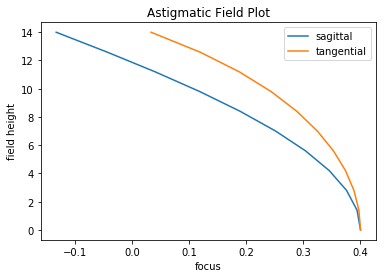

In [35]:
plt.plot(s_data, field_data, label='sagittal')
plt.plot(t_data, field_data, label='tangential')

plt.xlabel('focus')
plt.ylabel('field height')

plt.title("Astigmatic Field Plot")

plt.legend()

plt.show()

# Parabola with stop at the focus

In [36]:
app.model = OpticalModel()
opm = app.model
sm = opm.seq_model
osp = opm.optical_spec
pm = opm.parax_model

In [37]:
osp.pupil = PupilSpec(osp, pupil_type=PupilType.EPD, value=12.5)
osp.field_of_view = FieldSpec(osp, field_type=FieldType.OBJ_ANG, flds=[0., 2.0])
osp.spectral_region = WvlSpec([(555.0, 1.0)], ref_wl=0)

In [38]:
sm.gaps[0].thi=1e10

fl = 50.0
sm.add_surface([0.0, fl])
sm.stop_surface = 1
sm.insert(srf.Surface(lbl='M1', interact_mode=imode.Reflect, profile=Conic(r=-2*fl, cc=-1.0)), Gap(-fl))

In [39]:
opm.update_model()

In [40]:
fld, wvl, foc = osp.lookup_fld_wvl_focus(1)

In [41]:
s_data = []
t_data = []
field_data = []
field = Field()

In [42]:
for f in np.linspace(0., osp.field_of_view.max_field()[0], num=11):
    field.y = f
    s_dfoc, t_dfoc = trace_astigmatism(opm, field, wvl, foc)
    s_data.append(s_dfoc)
    t_data.append(t_dfoc)
    field_data.append(f)

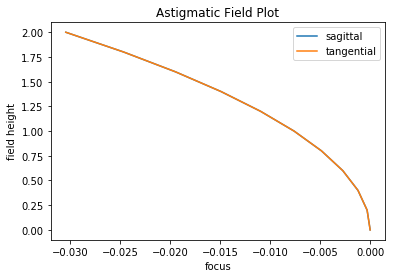

In [43]:
plt.plot(s_data, field_data, label='sagittal')
plt.plot(t_data, field_data, label='tangential')

plt.xlabel('focus')
plt.ylabel('field height')

plt.title("Astigmatic Field Plot")

plt.legend()

plt.show()

In [44]:
sm.list_surfaces()

0 Surface(lbl='Obj', profile=Spherical(c=0.0))
1 Surface(profile=Spherical(c=0.0))
2 Surface(lbl='M1', profile=Conic(c=-0.01, cc=-1.0))
3 Surface(lbl='Img', profile=Spherical(c=0.0))


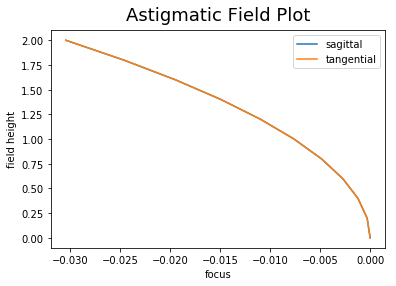

In [45]:
fig_astig = plt.figure(FigureClass=analysisplots.FieldCurveFigure, opt_model=opm).plot()